# Вариант №2.

In [2]:
variant = 2

Если что, ячейки можно скрывать по разделам `Markdown`.

# Импорты и определения

### Библиотеки и их настройка

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math as m
import string
from IPython.display import display, Math, Markdown  # для вывода формул в консоль

In [4]:
def mprint(*strings):  # функция вывода маркдаун в консоль
    for s in strings:
        display(Markdown(s))


def dataframe_to_markdown(df):
    markdown_table = "| Index | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2)) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table


# можно выводить latex в надписях matplotlib
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

### Парсинг вариантов

In [5]:
%pwd

'/Users/retrobanner/Projects/mephi_stats/bdz/var_2'

In [6]:
# считываем столбики для варианта
datas = pd.read_excel("../bdz_vars.xls", index_col=0).loc[variant]

datas.head()

1.1         B7 B8 B9
1.2               B7
2.1, 3.1          B7
2.2, 3.2          B7
2.3, 3.3     B11 B12
Name: 2, dtype: object

In [7]:
# создаём словарик: задание -> список столбцов
variant_dict = dict()
for tasks in datas.index:
    for task in tasks.split(", "):
        variant_dict[task] = datas[tasks].split(" ")

print(variant_dict)

{'1.1': ['B7', 'B8', 'B9'], '1.2': ['B7'], '2.1': ['B7'], '3.1': ['B7'], '2.2': ['B7'], '3.2': ['B7'], '2.3': ['B11', 'B12'], '3.3': ['B11', 'B12'], '2.4': ['B11', 'B12'], '3.4': ['B11', 'B12'], '4': ['B7'], '5': ['B11', 'B12'], '6': ['B3', 'B5'], '7': ['B6', 'B1'], '8.1': ['B11', 'B12'], '8.2': ['B7', 'B8', 'B9'], '9.1': ['B1', 'B2'], '9.2': ['B1', 'B2'], '9.3': ['B1', 'B4', 'B2']}


### Считываем информацию из excel

In [8]:
dfs = pd.read_excel("../bdz_data.xls", sheet_name=None)
dfs.keys()

dict_keys(['description', 'A - aaup', 'B - bodyfat', 'C - plasma', 'D - homedat'])

In [9]:
# создаём словарик: буква -> название листа в excel
sheet_dict = dict()
for value in list(dfs.keys())[1:]:
    key = value[0]
    sheet_dict[key] = value
print(sheet_dict)

{'A': 'A - aaup', 'B': 'B - bodyfat', 'C': 'C - plasma', 'D': 'D - homedat'}


In [10]:
# функция: задание -> необходимые данные
def data(task):
    X = []
    for data in variant_dict[task]:
        sheet = data[0]
        column = data
        df = dfs[sheet_dict[sheet]][column]
        X.append(df)
    return X

### Дополнительные функции

In [11]:
def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

# Раздел 1. Описательные статистики

## 1.1 Выборочные характеристики

### Условие

Анализируемый признак 1 – `B7` (Weight (lbs))

Анализируемый признак 2 – `B8` (Height (inches))

Анализируемый признак 3 – `B9` (Neck circumference (cm))

### Определения

In [12]:
columns = data("1.1")
for i in columns:
    print(i.head())

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64
0    67.75
1    72.25
2    66.25
3    72.25
4    71.25
Name: B8, dtype: float64
0    36.2
1    38.5
2    34.0
3    37.4
4    34.4
Name: B9, dtype: float64


### Формулы

| Выборочная характеристика                | Формула расчёта                                                                                                                                                                                                                                 |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Объём выборки                            | $n$                                                                                                                                                                                                                                             |
| Среднее                                  | $\overline x = \dfrac{1}{n} \sum\limits_{i = 1}^{n} x_i$                                                                                                                                                                                        |
| Выборочная дисперсия                     | $D_X^* = \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2$                                                                                                                                                                 |
| Выборочное среднеквадратичное отклонение | $\sigma_X^* = \sqrt{D_X^*} =\sqrt{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2}$                                                                                                                                       |
| Выборочный коэффициент асимметрии        | $\gamma_X^* = \dfrac{\mu_{3,X}^*}{\left(\sigma_X^*\right)^3} = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^3}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^{\frac{3}{2}}}$ |
| Выборочный эксцесс                       |      $\varepsilon_X^* = \dfrac{\mu_{4,X}^*}{\left(\sigma_X^*\right)^4} - 3 = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^4}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^2} - 3$                                                                                                                                                                                                                                           |


### Рассчёты

`pd.skew()` возвращает несмещенный выборочный коэффициент асимметрии, поэтому лучше использовать `stats.skew(bias=True)`, чтобы его получить.

То же самое касается функции `kurtosis()`.

In [13]:
for i, X in enumerate(columns, start=1):
    mean_ = X.mean()
    D = X.var(ddof=0)
    d = X.std(ddof=0)
    g = stats.skew(X, bias=True)
    e = stats.kurtosis(X, bias=True)
    output = f"$\\mathbf{{X_{i}}}:$ \
        $\\overline x_{i} =$ {mean_:.2f}; \
        $D^*_{{X_{i}}} =$ {D:.2f}; \
        $\\sigma^*_{{X_{i}}} =$ {d:.2f}; \
        $\\gamma^*_{{X_{i}}} =$ {g:.2f}; \
        $\\varepsilon^*_{{X_{i}}} =$ {e:.2f} \
        "
    mprint(output)

$\mathbf{X_1}:$         $\overline x_1 =$ 178.92;         $D^*_{X_1} =$ 860.30;         $\sigma^*_{X_1} =$ 29.33;         $\gamma^*_{X_1} =$ 1.20;         $\varepsilon^*_{X_1} =$ 5.14         

$\mathbf{X_2}:$         $\overline x_2 =$ 70.15;         $D^*_{X_2} =$ 13.36;         $\sigma^*_{X_2} =$ 3.66;         $\gamma^*_{X_2} =$ -5.35;         $\varepsilon^*_{X_2} =$ 58.35         

$\mathbf{X_3}:$         $\overline x_3 =$ 37.99;         $D^*_{X_3} =$ 5.89;         $\sigma^*_{X_3} =$ 2.43;         $\gamma^*_{X_3} =$ 0.55;         $\varepsilon^*_{X_3} =$ 2.64         

| Выборочная характеристика                | Признак 1 | Признак 2 | Признак 3 |
| ---------------------------------------- | --------- | --------- | --------- |
| Среднее                                  | 178.92    | 70.15     | 37.99     |
| Выборочная дисперсия                     | 860.30    | 13.36     | 5.89      |
| Выборочное среднеквадратичное отклонение | 29.33     | 3.66      | 2.43      |
| Выборочный коэффициент асимметрии        | 1.20      | -5.35     | 0.55      |
| Выборочный эксцесс                       | 5.14      | 58.35     | 2.64      |


## 1.2 Группировка и гистограммы частот

### Условие

Анализируемый признак – `B7` (Weight (lbs))

Объём выборки – `252`

### Определения

In [14]:
columns = data("1.2")
print(len(columns))
X = columns[0].to_frame()
X.columns = ["value"]
X.head()

1


,value
0,154.25
1,173.25
2,154.00
3,184.75
4,184.25


### Выбрать число групп

In [15]:
n = len(X["value"])
maximum = max(X["value"])
minimum = min(X["value"])
k = round(1 + 1.3 * m.log(n))
mprint(f"$\\mathbf{{X}}: \\max = {maximum}, \\min = {minimum}, n = {n}, k = {k}$")

$\mathbf{X}: \max = 363.15, \min = 118.5, n = 252, k = 8$

In [16]:
X["group"] = pd.cut(X["value"], bins=k)
X.head()

,value,group
0,154.25,"(149.081, 179.662]"
1,173.25,"(149.081, 179.662]"
2,154.00,"(149.081, 179.662]"
3,184.75,"(179.662, 210.244]"
4,184.25,"(179.662, 210.244]"


In [17]:
group_len = np.mean(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
mprint(f"$\\overline{{\\mid\\Delta_k\\mid}} =$ {group_len}")

$\overline{\mid\Delta_k\mid} =$ 30.611874999999998

| Число групп | Обоснование выбора числа групп               | Ширина интервалов |
| ----------- | -------------------------------------------- | ----------------- |
| 8           | Формула Стерджесса: $k \approx 1 + 1,3 \ln{n}$ |     30.61             |


### Построить таблицу частот

In [18]:
groups = pd.DataFrame(index=range(1, k + 1))
groups["low edge"] = [interval.left for interval in X["group"].cat.categories]
groups["high edge"] = [interval.right for interval in X["group"].cat.categories]
groups["frequency"] = X["group"].value_counts().sort_index().values
groups["relative frequency"] = groups["frequency"] / n
groups["cumulative frequency"] = groups["frequency"].cumsum()
groups["cumulative relative frequency"] = groups["cumulative frequency"] / n
groups

,low edge,high edge,frequency,relative frequency,cumulative frequency,cumulative relative frequency
1,118.255,149.081,31,0.123016,31,0.123016
2,149.081,179.662,110,0.436508,141,0.559524
3,179.662,210.244,76,0.301587,217,0.861111
4,210.244,240.825,29,0.115079,246,0.976190
5,240.825,271.406,5,0.019841,251,0.996032
6,271.406,301.987,0,0.000000,251,0.996032
7,301.987,332.569,0,0.000000,251,0.996032
8,332.569,363.150,1,0.003968,252,1.000000


In [19]:
# Чтобы быстрее заполнить табличку
print(dataframe_to_markdown(groups))

| Index | low edge | high edge | frequency | relative frequency | cumulative frequency | cumulative relative frequency |
|---|---|---|---|---|---|---|
| 1 | 118.25 | 149.08 | 31.0 | 0.12 | 31.0 | 0.12 |
| 2 | 149.08 | 179.66 | 110.0 | 0.44 | 141.0 | 0.56 |
| 3 | 179.66 | 210.24 | 76.0 | 0.3 | 217.0 | 0.86 |
| 4 | 210.24 | 240.82 | 29.0 | 0.12 | 246.0 | 0.98 |
| 5 | 240.82 | 271.41 | 5.0 | 0.02 | 251.0 | 1.0 |
| 6 | 271.41 | 301.99 | 0.0 | 0.0 | 251.0 | 1.0 |
| 7 | 301.99 | 332.57 | 0.0 | 0.0 | 251.0 | 1.0 |
| 8 | 332.57 | 363.15 | 1.0 | 0.0 | 252.0 | 1.0 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Накопленная частота | Относительная накопленная частота |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------- | --------------------------------- |
| 1               | 118.25         | 149.08          | 31      | 0.12                  | 31                  | 0.12                              |
| 2               | 149.08         | 179.66          | 110     | 0.44                  | 141                 | 0.56                              |
| 3               | 179.66         | 210.24          | 76      | 0.3                   | 217                 | 0.86                              |
| 4               | 210.24         | 240.82          | 29      | 0.12                  | 246                 | 0.98                              |
| 5               | 240.82         | 271.41          | 5       | 0.02                  | 251                 | 1.00                              |
| 6               | 271.41         | 301.99          | 0       | 0.0                   | 251                 | 1.00                              |
| 7               | 301.99         | 332.57          | 0       | 0.0                   | 251                 | 1.00                              |
| 8               | 332.57         | 363.15          | 1       | 0.0                   | 252                 | 1.00                              |

### Построить гистограммы частот и полигоны частот

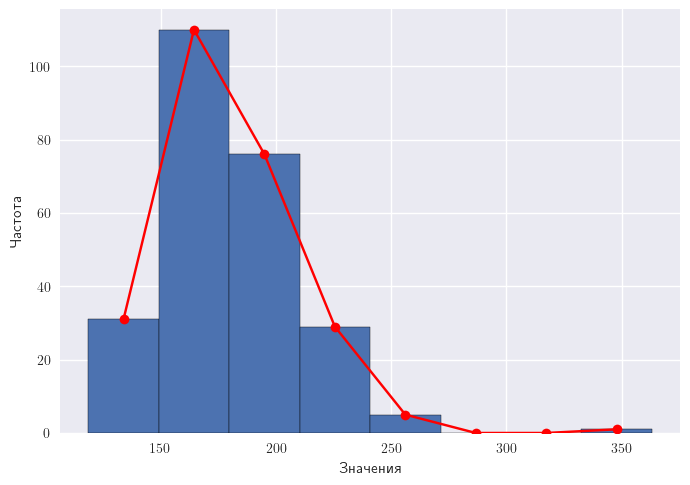

In [20]:
frequences, bins, _ = plt.hist(X["value"], bins=k, edgecolor="black")

bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, frequences, marker="o", color="r")

plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

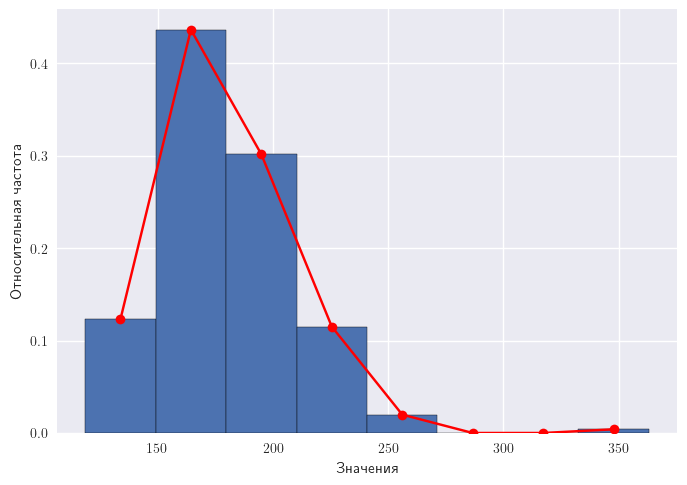

In [21]:
plt.bar(
    bin_centers,
    groups["relative frequency"],
    width=np.diff(bins),
    edgecolor="black",
)
plt.plot(bin_centers, groups["relative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

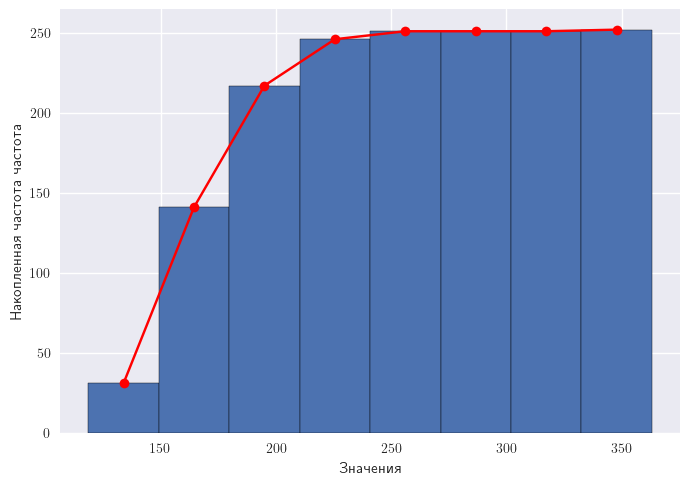

In [22]:
plt.bar(
    bin_centers,
    groups["cumulative frequency"],
    width=np.diff(bins),
    edgecolor="black",
)
plt.plot(bin_centers, groups["cumulative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Накопленная частота частота")
plt.show()

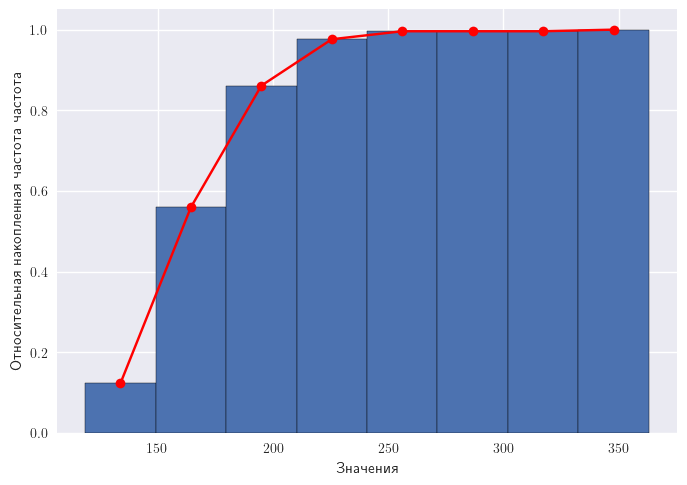

In [23]:
plt.bar(
    bin_centers,
    groups["cumulative relative frequency"],
    width=np.diff(bins),
    edgecolor="black",
)
plt.plot(bin_centers, groups["cumulative relative frequency"], marker="o", color="r")
plt.xlabel("Значения")
plt.ylabel("Относительная накопленная частота частота")
plt.show()

### Построить эмпирическую фукнцию распределения

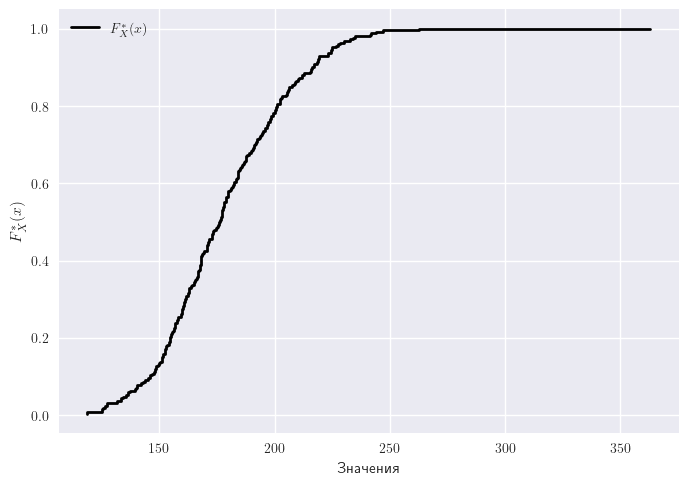

In [24]:
y = np.arange(1, n + 1) / n

plt.step(X["value"].sort_values(), y, label=r"$F_X^*(x)$", linewidth=2, color="black")
plt.xlabel("Значения")
plt.ylabel("$F^*_X(x)$")
plt.legend()
plt.show()

# Раздел 2. Интервальные оценки

## 2.1 Доверительные интервалы для математического ожидания

### Условие

Анализируемый признак – `B7` (Weight (lbs))

Объём выборки – `252`

Оцениваемый параметр – `m`

### Определения

In [25]:
X = data("2.1")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [26]:
n = len(X)
n

252

### Привести формулы расчёта доверительных интервалов

Так как у нас есть только выборка, мы не можем знать параметров генеральной совокупности(в том числе $m$ и $\sigma$), поэтому будем рассчитывать доверительные интервалы, используя данный факт. 

В данном случае `стьюдентизованное среднее` выступает в качестве центральной статистики:

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\overline {\mathbf{X}} - \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |
| Верхняя граница                  | $\overline {\mathbf{X}} + \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |


### Рассчитать доверительные интервалы

In [27]:
intervals = pd.DataFrame(index=["Нижняя граница", "Верхняя граница"])
alphas = [0.01, 0.05, 0.1]
std_err = stats.sem(X)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n - 1, loc=X.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Нижняя граница,174.119136,175.278258,175.867935
Верхняя граница,183.729673,182.570551,181.980874


In [28]:
print(dataframe_to_markdown(intervals))

| Index | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 174.12 | 175.28 | 175.87 |
| Верхняя граница | 183.73 | 182.57 | 181.98 |



| Index | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 174.12 | 175.28 | 175.87 |
| Верхняя граница | 183.73 | 182.57 | 181.98 |

## 2.2 Доверительные интервалы для дисперсии

### Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – `252`

Оцениваемый параметр – $\sigma^2$

### Определения

In [29]:
X = data("2.2")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [30]:
print(n := len(X))

252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, \left(n-1\right)}}$ |
| Верхняя граница                  | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, \left(n-1\right)}}$ |


### Рассчитать доверительные интервалы

In [31]:
intervals = pd.DataFrame(index=["Нижняя граница", "Верхняя граница"])
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    chi2_upper, chi2_lower = stats.chi2.interval(1 - alpha, df=n - 1)
    intervals[f"$\\alpha =$ {alpha}"] = [
        (n - 1) * X.var(ddof=1) / chi2_lower,
        (n - 1) * X.var(ddof=1) / chi2_upper,
    ]
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Нижняя граница,693.828100,730.497795,750.270312
Верхняя граница,1100.224941,1037.243286,1006.856772


In [32]:
print(dataframe_to_markdown(intervals))

| Index | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 693.83 | 730.5 | 750.27 |
| Верхняя граница | 1100.22 | 1037.24 | 1006.86 |



| Index           | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| --------------- | --------------- | --------------- | -------------- |
| Нижняя граница  | 693.83          | 730.5           | 750.27         |
| Верхняя граница | 1100.22         | 1037.24         | 1006.86        |

## 2.3. Доверительные интервалы для разности мат. ожиданий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Оцениваемый параметр – $m_1 - m_2$

### Определения

In [33]:
X1, X2 = data("2.3")
X1.head(), X2.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [34]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                                                                                                 |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) - t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| Верхняя граница                  | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) + t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| $S$                              | $\sqrt{\dfrac{(n_1 - 1)S_1^2 + (n_2-1) S_2^2}{n_1 + n_2 -2}}  $                                                                                                            |


### Рассчитать доверительные интервалы

In [35]:
intervals = pd.DataFrame(index=["Нижняя граница", "Верхняя граница"])
alphas = [0.01, 0.05, 0.1]
std_err = m.sqrt(
    ((n1 - 1) * X1.var(ddof=1) + (n2 - 1) * X2.var(ddof=1))
    / (n1 + n2 - 2)
    * (1 / n1 + 1 / n2)
)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n1 + n2 - 2, loc=X1.mean() - X2.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Нижняя граница,-9.457466,-8.951063,-8.692701
Верхняя граница,-5.240153,-5.746556,-6.004918


In [36]:
print(dataframe_to_markdown(intervals))

| Index | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | -9.46 | -8.95 | -8.69 |
| Верхняя граница | -5.24 | -5.75 | -6.0 |



| Index           | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| --------------- | --------------- | --------------- | -------------- |
| Нижняя граница  | -9.46           | -8.95           | -8.69          |
| Верхняя граница | -5.24           | -5.75           | -6.0           |

## 2.4. Доверительные интервалы для отношения дисперсий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 =$ `252`

Оцениваемый параметр – $\dfrac{\sigma_1^2}{\sigma_2^2}$


### Определения

In [37]:
X1, X2 = data("2.4")
X1.head(), X2.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [38]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                       |
| -------------------------------- | --------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{S_1^2}{S_2^2} \cdot F_{\frac{\alpha}{2}, (n_1-1, n_2-1)}$     |
| Верхняя граница                  | $\dfrac{S_1^2}{S_2^2} \cdot F_{1 - \frac{\alpha}{2}, (n_1-1, n_2-1)}$ |

### Рассчитать доверительные интервалы

In [39]:
intervals = pd.DataFrame(index=["Нижняя граница", "Верхняя граница"])
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.f.interval(
        1 - alpha, dfn=n1 - 1, dfd=n2 - 1, loc=0, scale=X1.var(ddof=1) / X2.var(ddof=1)
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Нижняя граница,1.634915,1.767942,1.839998
Верхняя граница,3.139347,2.903130,2.789441


In [40]:
print(dataframe_to_markdown(intervals))

| Index | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 1.63 | 1.77 | 1.84 |
| Верхняя граница | 3.14 | 2.9 | 2.79 |



| Index           | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| --------------- | --------------- | --------------- | -------------- |
| Нижняя граница  | 1.63            | 1.77            | 1.84           |
| Верхняя граница | 3.14            | 2.9             | 2.79           |


# Раздел 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

## 3.1. Проверка статистических гипотез о математических ожиданиях

### Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – `252`

Статистическая гипотеза: $H_0:\ m = m_0;\ \ \ H':\ m \neq m_0$

### Определения

In [41]:
X = data("3.1")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [42]:
print(n := len(X))

252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------ |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline X - m_0}{S/\sqrt{n}}$                              |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n - 1)$                                                               |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n - 1}$                                    |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$ |


### Выбрать произвольные значения $m_0$ и проверить статистические гипотезы

In [43]:
alpha = 0.1
m0_list = [120, 180, 240]

mprint(r"### T-test")
for m0 in m0_list:
    z, p_value = stats.ttest_1samp(X, m0)
    mprint(
        r"---",
        f"$H_0: m = m_0 = {m0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### T-test

---

$H_0: m = m_0 = 120$

$z_{выб} =$ 31.83

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: m = m_0 = 180$

$z_{выб} =$ -0.58

$p =$ 0.56

$H_0$ принимается

---

$H_0: m = m_0 = 240$

$z_{выб} =$ -32.99

$p =$ 0.00

$H_0$ отклоняется

| $m_0$ | Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод        |
| ----- | ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------ |
| 120   | 0.1                | 31.83                                        | 0.00      | $H_0$ отклоняется      | $m \neq 120$ |
| 180   | 0.1                | -0.58                                        | 0.56      | $H_0$ принимается      | $m = 180$    |
| 240   | 0.1                | -32.99                                       | 0.00      | $H_0$ отклоняется      | $m \neq 240$ |


## 3.2 Проверка статистических гипотез о дисперсиях

### Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – `252`

Статистическая гипотеза: $H_0:\ \sigma = \sigma_0;\ \ \ H':\ \sigma \neq \sigma_0$

### Определения

In [44]:
X = data("3.2")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [45]:
print(n := len(X))

252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $m$, значит используем $\chi^2-test$.

|                                                                                  | Выражение                                                                 |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{(n - 1)S^2}{\sigma_0^2}$                                      |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(n - 1)$                                                           |
| Формулы расчёта критических точек                                                | $\chi^2_{\frac{\alpha}{2}, n - 1},\ \chi^2_{1 - \frac{\alpha}{2}, n - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$  |


### Выбрать произвольные значения $\sigma_0$ и проверить статистические гипотезы

In [46]:
def chisquare(X, value):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / value**2
    cdf = stats.chi2.cdf(z, df=n - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [47]:
alpha = 0.1
std0_list = [10, 20, 30]

mprint(r"### $\chi^2$-test")
for std0 in std0_list:
    z, p_value = chisquare(X, std0)
    mprint(
        r"---",
        f"$H_0: \\sigma = \\sigma_0 = {std0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### $\chi^2$-test

---

$H_0: \sigma = \sigma_0 = 10$

$z_{выб} =$ 2167.94

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: \sigma = \sigma_0 = 20$

$z_{выб} =$ 541.99

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: \sigma = \sigma_0 = 30$

$z_{выб} =$ 240.88

$p =$ 0.67

$H_0$ принимается

| $\sigma_0$ | Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод            |
| ---------- | ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------------- |
| 10         | 0.1                | 2167.94                                      | 0.00      | $H_0$ отклоняется      | $\sigma \neq 10$ |
| 20         | 0.1                | 541.99                                       | 0.00      | $H_0$ отклоняется      | $\sigma \neq 20$ |
| 30         | 0.1                | 240.88                                       | 0.67      | $H_0$ принимается      | $\sigma = 30$    |

## 3.3 Проверка статистических гипотез о равенстве математических ожиданий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Статистическая гипотеза: $H_0:\ m_1 = m_2;\ \ \ H':\ m_1 \neq m_2$

### Определения

In [48]:
X1, X2 = data("3.3")
X1.head(), X2.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [49]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                                                                                                  |
| -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline{X_1} - \overline{X_2}}{S\sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}}}$, где $S^2 = \dfrac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n_1 + n_2 - 2)$                                                                                                                                         |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n_1 + n_2 - 2}$                                                                                                              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                   |


### Проверить статистические гипотезы

In [50]:
alphas = [0.01, 0.05, 0.1]
z, p_value = stats.ttest_ind(X1, X2)
mprint(
    r"### two-sample T-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)
for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### two-sample T-test

$H_0: m_1 = m_2$

$z_{выб} =$ -9.01

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод        |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------ |
| 0.01               | -9.01                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |
| 0.05               | -9.01                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$    |
| 0.1                | -9.01                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |


## 3.4 Проверка статистических гипотез о равенстве дисперсий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Статистическая гипотеза: $H_0:\ \sigma_1 = \sigma_2;\ \ \ H':\ \sigma_1 \neq \sigma_2$

### Определения

In [51]:
X1, X2 = data("3.4")
X1.head(), X2.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [52]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                 |
| -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{S_1^2}{S_2^2}$                                                                |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(n_1 - 1,\ n_2 - 1)$                                                                    |
| Формулы расчёта критических точек                                                | $F_{\frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1},\ F_{1 - \frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                  |

### Проверить статистические гипотезы

In [53]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [54]:
alphas = [0.01, 0.05, 0.1]
z, p_value = Ftest(X1, X2)
mprint(
    r"### F-test",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### F-test

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 2.27

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 2.27                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |
| 0.05               | 2.27                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |
| 0.1                | 2.27                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |

# Раздел 4. Критерии согласия

## Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – `252`

## Определения

In [55]:
X = data("4")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [56]:
print(n := len(X))

252


## 4.1. Критерий $\chi^2$ 

Теоретическое распределение - нормальное.

Статистическая гипотеза - $H_0:\ X \sim N;\ \ \ H':\ X \nsim N$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                         | Пояснение использованных обозначений                                                                                                                                                                                                                                                                                                                                               |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \sum\limits_{i=1}^{k} \dfrac{\left(n_i - n \cdot p_i\right)^2}{n \cdot p_i}$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $p_i$ - вероятность попадания случайной величины $\mathbf X$ в интервал $\Delta_i$ в условиях $H_0$, то есть, если $\Delta_i = (a_{i-1}, a_{i}]$, то $$p_i = \int\limits_{a_{i-1}}^{a_{i}}g(x)dx = G(a_{i}) - G(a_{i-1}).$$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - r - 1)$                                                               | $r$ - количество оцениваемых параметров у предполагаемого распределения $G$.                                                                                                                                                                                                                                                                                                       |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - r - 1}$                                                 | Малые значения $Z$ нам также подходят, поэтому критическая область выбирается правосторонней                                                                                                                                                                                                                                                                                       |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                |                                                                                                                                                                                                                                                                                                                                                                                    |

### Выбрать число групп

Обычно выбирают число групп по формуле Стерджесса: $k \approx 1 + 1,3 \ln{n}$.

Однако критерий $\chi^2$ чувствителен к группам, для которых ожидаемые частоты $n \cdot p_i$ меньше 5. Поэтому при группировке нужно учитывать это.

Рассмотрим данный пример:

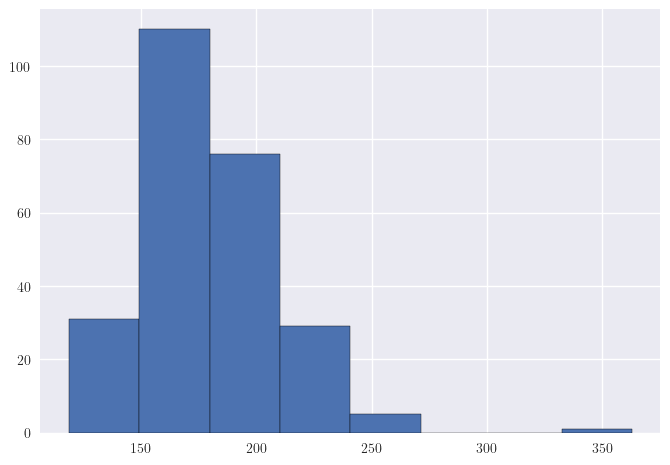

In [57]:
k = round(1 + 1.3 * m.log(n))
frequences, bin_edges, _ = plt.hist(X, bins=k, edgecolor="black")
plt.show()

Для каждого интервала $[a_{i-1}, a_i]$ найдём $p_i = G(a_i) - G(a_{i-1})$ - вероятность попадания случайной величины $\mathbf X$ в интервал $[a_{i-1}, a_i]$ в условиях $H_0$.

Напомним, что в данном случае теоретическое распределение - нормальное. Поэтому и будем использовать `stats.norm.cdf()`.

In [58]:
probabilities = np.diff(stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf(bin_edges))
probabilities

array([1.35055454e-01, 3.55071966e-01, 3.46696912e-01, 1.25693091e-01,
       1.67664622e-02, 8.11224914e-04, 1.40249714e-05, 8.55288832e-08])

Мы нашли вероятности попасть в каждый интервал. Теперь найдём ожидаемые частоты $n \cdot p_i$.

In [59]:
expected_frequencies = n * probabilities
expected_frequencies

array([3.40339743e+01, 8.94781354e+01, 8.73676218e+01, 3.16746590e+01,
       4.22514847e+00, 2.04428678e-01, 3.53429279e-03, 2.15532786e-05])

Как видим, для первого и четырёх последних интервалов ожидаемые частоты меньше 5. Условие $n \cdot p_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [60]:
def adjust_intervals(bin_edges, expected_frequencies, k=None):
    """
    Функция для корректировки интервалов и вероятностей

    Параметры:
    bin_edges: list
        Границы интервалов
    expected_frequencies: list
        Ожидаемые частоты
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой ожидаемой частотой с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой ожидаемой частотой, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых ожидаемая частота большая, таким образом получая на выходе k >= len(intervals).
    """

    bin_edges_copy = bin_edges.copy()
    expected_frequencies_copy = expected_frequencies.copy()

    # Шаг 1: Объединяем интервалы с малой частотой
    i = 0
    while True:
        if expected_frequencies_copy[i] <= 5:
            if i == 0:  # Крайний левый интервал
                bin_edges_copy.pop(i + 1)
                expected_frequencies_copy[i + 1] += expected_frequencies_copy[i]

            elif i == len(bin_edges_copy) - 2:  # Крайний правый интервал
                bin_edges_copy.pop(i)
                expected_frequencies_copy[i - 1] += expected_frequencies_copy[i]
            else:  # Объединяем с соседом c наименьшим expected_frequencies_copy
                if expected_frequencies_copy[i - 1] < expected_frequencies_copy[i + 1]:
                    bin_edges_copy.pop(i)
                    expected_frequencies_copy[i - 1] += expected_frequencies_copy[i]
                else:
                    bin_edges_copy.pop(i + 1)
                    expected_frequencies_copy[i + 1] += expected_frequencies_copy[i]
            expected_frequencies_copy.pop(i)
            i -= 1

        i += 1
        if i >= len(bin_edges_copy) - 1:
            break

    # Этап 2: Подразбиение интервалов c большими ожидаемыми частотами, если k != None
    if k is not None:
        while len(bin_edges_copy) < k + 1:
            # Найти интервал с максимальной вероятностью
            max_index = expected_frequencies_copy.index(max(expected_frequencies_copy))
            a, b = bin_edges_copy[max_index : max_index + 2]
            c = (a + b) / 2  # Точка разделения

            # Ожидаемые частоты примерно поделятся пополам (допускается погрешность)
            e_left = e_right = expected_frequencies_copy[max_index] / 2

            bin_edges_copy.insert(max_index + 1, c)

            expected_frequencies_copy[max_index] = e_left
            expected_frequencies_copy.insert(max_index + 1, e_right)

    return expected_frequencies_copy, bin_edges_copy

In [61]:
expected_frequencies, bin_edges = adjust_intervals(
    bin_edges.tolist(), expected_frequencies.tolist(), k=k
)
expected_frequencies

[34.03397434022345,
 22.36953384918518,
 22.36953384918518,
 22.36953384918518,
 22.36953384918518,
 43.68381092445328,
 43.68381092445328,
 36.10779200994649]

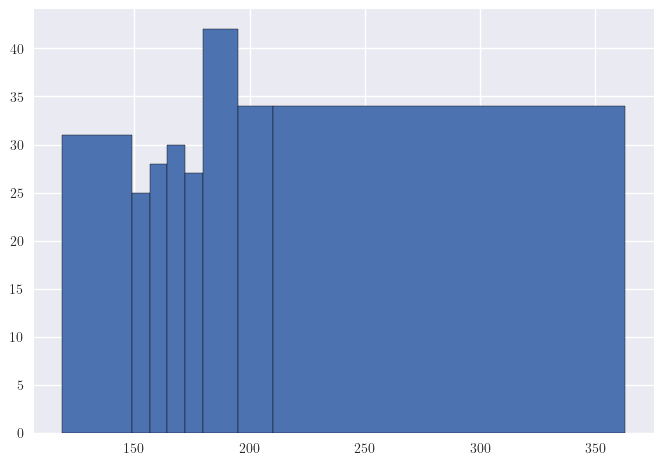

In [62]:
groups = pd.DataFrame(index=range(1, len(bin_edges)))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency"] = groups.apply(
    lambda row: ((X >= row["low edge"]) & (X < row["high edge"])).sum(), axis=1
)

plt.bar(
    (groups["high edge"] + groups["low edge"]) / 2,
    groups["frequency"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
)
plt.show()

Гистограмма выглядит не слишком красиво, зато на интервалы всё разбито правильно.

In [63]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 7.65 до 152.91

| Число интервалов | Обоснование выбора числа интервалов                                                                               | Ширина интервалов |
| ---------------- | ----------------------------------------------------------------------------------------------------------------- | ----------------- |
| 8                | $k \approx 1 + 1,3 \ln{n}$ - формула Стерджесса $\\n \cdot p_i \gtrsim 5$ - поправка на чувствительность критерия | от 7.65 до 152.91 |



### Построить таблицу частот

Нужно пересчитать ожидаемые частоты, так как в функции объединения интервалов возникли погрешности.

In [64]:
expected_frequencies = (
    np.diff(stats.norm.cdf(bin_edges, loc=X.mean(), scale=X.std(ddof=1))) * n
)
expected_frequencies

array([34.03397434, 17.66170356, 21.47264575, 24.4069558 , 25.93683028,
       49.70475435, 37.6628675 , 36.10779201])

In [65]:
groups["relative frequency"] = groups["frequency"] / n
groups["expected frequency"] = expected_frequencies
groups

,low edge,high edge,frequency,relative frequency,expected frequency
1,118.500000,149.081250,31,0.123016,34.033974
2,149.081250,156.726562,25,0.099206,17.661704
3,156.726562,164.371875,28,0.111111,21.472646
4,164.371875,172.017187,30,0.119048,24.406956
5,172.017187,179.662500,27,0.107143,25.936830
6,179.662500,194.953125,42,0.166667,49.704754
7,194.953125,210.243750,34,0.134921,37.662867
8,210.243750,363.150000,34,0.134921,36.107792


In [66]:
print(dataframe_to_markdown(groups))

| Index | low edge | high edge | frequency | relative frequency | expected frequency |
|---|---|---|---|---|---|
| 1 | 118.5 | 149.08 | 31.0 | 0.12 | 34.03 |
| 2 | 149.08 | 156.73 | 25.0 | 0.1 | 17.66 |
| 3 | 156.73 | 164.37 | 28.0 | 0.11 | 21.47 |
| 4 | 164.37 | 172.02 | 30.0 | 0.12 | 24.41 |
| 5 | 172.02 | 179.66 | 27.0 | 0.11 | 25.94 |
| 6 | 179.66 | 194.95 | 42.0 | 0.17 | 49.7 |
| 7 | 194.95 | 210.24 | 34.0 | 0.13 | 37.66 |
| 8 | 210.24 | 363.15 | 34.0 | 0.13 | 36.11 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Вероятность попадания в интервал при условии истинности основной гипотезы |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------------------------------------------------------------- |
| 1               | 118.5          | 149.08          | 31.0    | 0.12                  | 34.03                                                                     |
| 2               | 149.08         | 156.73          | 25.0    | 0.1                   | 17.66                                                                     |
| 3               | 156.73         | 164.37          | 28.0    | 0.11                  | 21.47                                                                     |
| 4               | 164.37         | 172.02          | 30.0    | 0.12                  | 24.41                                                                     |
| 5               | 172.02         | 179.66          | 27.0    | 0.11                  | 25.94                                                                     |
| 6               | 179.66         | 194.95          | 42.0    | 0.17                  | 49.7                                                                      |
| 7               | 194.95         | 210.24          | 34.0    | 0.13                  | 37.66                                                                     |
| 8               | 210.24         | 363.15          | 34.0    | 0.13                  | 36.11                                                                     |

### Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике

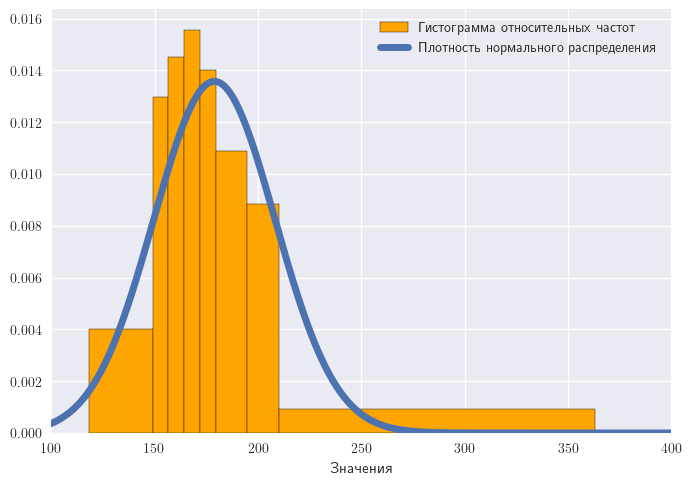

In [67]:
grid = np.linspace(X.min() - 100, X.max() + 100, 1000)
plt.hist(
    X,
    bins=bin_edges,
    edgecolor="black",
    density=True,
    label="Гистограмма относительных частот",
    color="orange",
)

plt.plot(
    grid,
    stats.norm.pdf(grid, loc=X.mean(), scale=X.std(ddof=1)),
    label="Плотность нормального распределения",
    lw=5,
)
plt.legend()
plt.xlim(100, 400)
plt.xlabel("Значения")
plt.show()

### Проверить статистические гипотезы

In [68]:
def chi2_gof(obs_frequency, exp_frequency, ddof=0):
    k = len(obs_frequency)
    z = sum((obs_frequency - exp_frequency) ** 2 / exp_frequency)
    p_value = stats.chi2.sf(z, df=k - ddof - 1)
    return z, p_value

In [69]:
alphas = [0.01, 0.05, 0.1]

z, p_value = chi2_gof(groups["frequency"], groups["expected frequency"], ddof=2)
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 8.30

$p =$ 0.14

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

## 4.2. Критерий Харке-Бера

Статистическая гипотеза: $H_0:\ X \sim N;\ \ \ H':\ X \nsim N$

### Теоретическая справка

Критерий Харке-Бера (Jarque-Bera) - это критерий проверки гипотезы о нормальности выборки:

$H_0:\ X \sim N;\ \ \ H':\ X \nsim N$

Для проверки нормальности распределения нулевая гипотеза разбивается на две части:

$$H_0^{(1)}: \gamma_X = 0;\ \ \ H'^{(1)}: \gamma_X \neq 0$$
$$H_0^{(2)}: \varepsilon_X = 0;\ \ \ H'^{(2)}: \varepsilon_X \neq 0, где$$

$\gamma_X$ - [коэффициент асимметрии](#формулы), $\varepsilon_X$ - [эксцесс](#формулы).

Для этих гипотез используются следующие статистики:

$Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\ \ \ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$, при этом $Z_1 \mid_{H_0^{(1)}} \sim N(0, 1);\ \ \ Z_2 \mid_{H_0^{(2)}} \sim N(0, 1)$.

Если хоть одна $H_0^{(1)}$ или $H_0^{(2)}$ отклоняется, то исходная гипотеза $H_0$ отклоняется.

Для проверки основной гипотезы строится общая статистика: $Z = Z_1^2 + Z_2^2$, при этом $Z \mid_{H_0} \sim \chi^2(2)$. Критическая область - правосторонняя.

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = Z^2_1 + Z^2_2$, где $\\Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\\ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$ | $\gamma^*_X$ - [выборочный коэффициент асимметрии](#формулы), $\\ \varepsilon^*_X$ - [выборочный эксцесс](#формулы), $\\ n$ - объём выборки. |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(2)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ 2}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Проверить статистические гипотезы

In [70]:
z, p_value = stats.jarque_bera(X)
mprint(
    r"### Jarque-Bera test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Jarque-Bera test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 337.89

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод       |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ----------- |
| 0.01               | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |
| 0.05               | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |
| 0.1                | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |

Вывод (в терминах предметной области): 

В результате проведённого в п.4 статистического анализа обнаружено, что критерий $\chi^2$ не отвергает гипотезу о нормальности распределения, но критерий Харке-Бера отвергает её.

Так как для этих данных критерий Харке-Бера более чувствителен, чем критерий $\chi^2$, то можно сделать вывод, что выборка `B7` (Weight (lbs)) не имеет нормального распределения.

# Раздел 5. Проверка однородности выборок

## Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

## Определения

In [132]:
X, Y = data("5")

X.head(), Y.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [133]:
print(n1 := len(X), n2 := len(Y))

252 252


## 5.1 Критерий знаков

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x);\ \ \ H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{K_+ - \dfrac{n}{2}}{\sqrt{\dfrac{n}{4}}}$ | $K_+$ - количество знаков `+` в выборке $z_1, \dots, z_n = x_1 - y_1, \dots, x_n - y_n$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $N(0, 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\pm u_{1 - \frac{\alpha}{2}}$                                                                                                         | Двусторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                                |                                                                                                                                         |


### Проверить статистические гипотезы

In [76]:
def sign_test(X, Y):
    if len(X) != len(Y):
        raise ValueError("Длины выборок должны совпадать")
    n = len(X)
    k = sum(X > Y)
    z = (k - n / 2) / m.sqrt(n / 4)
    p_value = 2 * min(stats.norm.cdf(z), 1 - stats.norm.cdf(z))
    return z, p_value

In [77]:
alphas = [0.01, 0.05, 0.1]

z, p_value = sign_test(X, Y)
mprint(
    r"### Sign test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Sign test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ -12.72

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | -12.72                                       | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | -12.72                                       | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | -12.72                                       | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

## 5.2 Критерий $\chi^2$

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x);\ \ \ H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = nm\sum\limits_{i=1}^{k}\dfrac{1}{n_i+m_i}\left(\dfrac{n_i}{n} + \dfrac{m_i}{m}\right)$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $m_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $n$ - объём выборки $x_1, \dots, x_n$ $\\$ $m$ - объём выборки $y_1, \dots, y_m$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - 1}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Выбрать число групп

Обычно выбирают число групп по формуле Стерджесса: $k \approx 1 + 1,3 \ln{\max(n, m)}$.

Однако критерий $\chi^2$ чувствителен к группам, для которых $n_i + m_i$ меньше 5. Поэтому при группировке нужно учитывать это.

Рассмотрим данный пример:

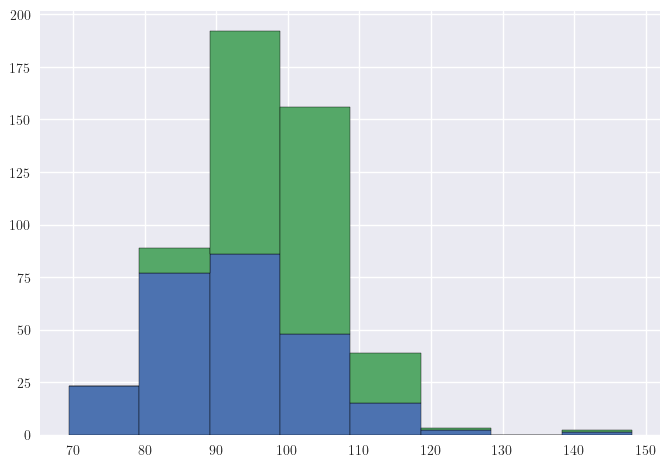

In [134]:
k = round(1 + 1.3 * m.log(max(n1, n2)))

frequences, bin_edges, _ = plt.hist((X, Y), bins=k, edgecolor="black", stacked=True)
plt.show()

Посмотрим на значения $n_i + m_i$ для каждого интервала.

In [137]:
frequences[1]

array([ 23.,  89., 192., 156.,  39.,   3.,   0.,   2.])

Как видим, для последних трёх интервалов $n_i + m_i < 5$. Условие $n_i + m_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [140]:
frequences, bin_edges = adjust_intervals(
    bin_edges.tolist(), frequences[1].tolist(), k=k
)

frequences  # неточное значение. нужно пересчитать будет

[23.0, 89.0, 48.0, 48.0, 96.0, 78.0, 78.0, 44.0]

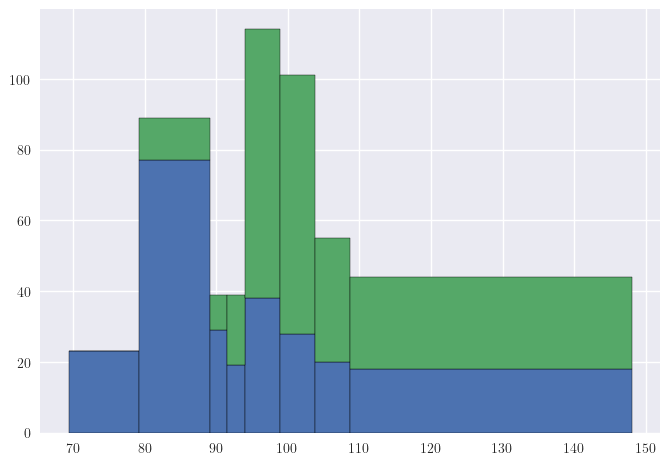

In [141]:
frequences, bin_edges, _ = plt.hist(
    (X, Y), bins=bin_edges, edgecolor="black", stacked=True
)
plt.show()

In [142]:
frequences[1]

array([ 23.,  89.,  39.,  39., 114., 101.,  55.,  44.])

Теперь группировка выборок проведена правильно.

In [144]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 2.46 до 39.35

| Число интервалов | Обоснование выбора числа интервалов                                                                               | Ширина интервалов |
| ---------------- | ----------------------------------------------------------------------------------------------------------------- | ----------------- |
| 8                | $k \approx 1 + 1.3 \ln \max(n, m)$ - формула Стерджесса $\\n_i + m_i \gtrsim 5$ - поправка на чувствительность критерия | от 2.46 до 39.35 |



### Построить таблицу частот

In [147]:
groups = pd.DataFrame(index=range(1, len(bin_edges)))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency1"] = frequences[0]
groups["frequency2"] = frequences[1] - frequences[0]
groups["relative frequency1"] = groups["frequency1"] / n1
groups["relative frequency2"] = groups["frequency2"] / n2

groups

,low edge,high edge,frequency1,frequency2,relative frequency1,relative frequency2
1,69.400000,79.237500,23.0,0.0,0.091270,0.000000
2,79.237500,89.075000,77.0,12.0,0.305556,0.047619
3,89.075000,91.534375,29.0,10.0,0.115079,0.039683
4,91.534375,93.993750,19.0,20.0,0.075397,0.079365
5,93.993750,98.912500,38.0,76.0,0.150794,0.301587
6,98.912500,103.831250,28.0,73.0,0.111111,0.289683
7,103.831250,108.750000,20.0,35.0,0.079365,0.138889
8,108.750000,148.100000,18.0,26.0,0.071429,0.103175


In [148]:
print(dataframe_to_markdown(groups))

| Index | low edge | high edge | frequency1 | frequency2 | relative frequency1 | relative frequency2 |
|---|---|---|---|---|---|---|
| 1 | 69.4 | 79.24 | 23.0 | 0.0 | 0.09 | 0.0 |
| 2 | 79.24 | 89.08 | 77.0 | 12.0 | 0.31 | 0.05 |
| 3 | 89.08 | 91.53 | 29.0 | 10.0 | 0.12 | 0.04 |
| 4 | 91.53 | 93.99 | 19.0 | 20.0 | 0.08 | 0.08 |
| 5 | 93.99 | 98.91 | 38.0 | 76.0 | 0.15 | 0.3 |
| 6 | 98.91 | 103.83 | 28.0 | 73.0 | 0.11 | 0.29 |
| 7 | 103.83 | 108.75 | 20.0 | 35.0 | 0.08 | 0.14 |
| 8 | 108.75 | 148.1 | 18.0 | 26.0 | 0.07 | 0.1 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота признака 1 | Частота признака 2 | Относительная частота признака 1 | Относительная частота признака 2 |
| --------------- | -------------- | --------------- | ------------------ | ------------------ | -------------------------------- | -------------------------------- |
| 1               | 69.4           | 79.24           | 23.0               | 0.0                | 0.09                             | 0.0                              |
| 2               | 79.24          | 89.08           | 77.0               | 12.0               | 0.31                             | 0.05                             |
| 3               | 89.08          | 91.53           | 29.0               | 10.0               | 0.12                             | 0.04                             |
| 4               | 91.53          | 93.99           | 19.0               | 20.0               | 0.08                             | 0.08                             |
| 5               | 93.99          | 98.91           | 38.0               | 76.0               | 0.15                             | 0.3                              |
| 6               | 98.91          | 103.83          | 28.0               | 73.0               | 0.11                             | 0.29                             |
| 7               | 103.83         | 108.75          | 20.0               | 35.0               | 0.08                             | 0.14                             |
| 8               | 108.75         | 148.1           | 18.0               | 26.0               | 0.07                             | 0.1                              |

### Построить гистограммы относительных частот на одном графике

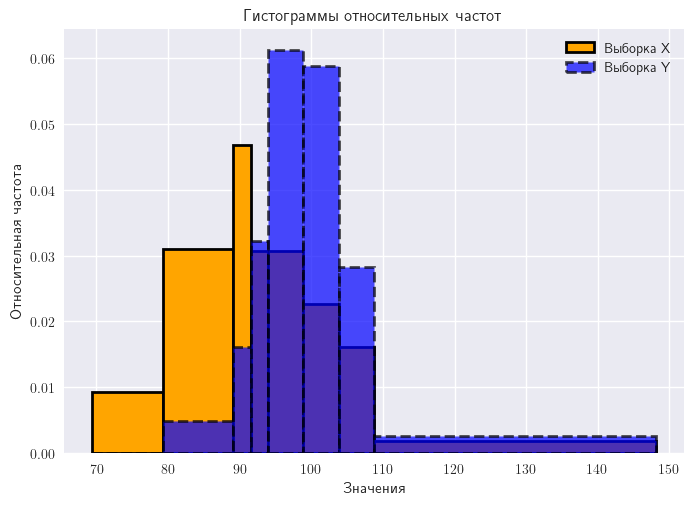

In [167]:
plt.hist(
    X,
    bins=bin_edges,
    edgecolor="black",
    density=True,
    label="Выборка X",
    color="orange",
    lw=2,
)
plt.hist(
    Y,
    bins=bin_edges,
    edgecolor="black",
    density=True,
    label="Выборка Y",
    alpha=0.7,
    linestyle="--",
    lw=2,
    color="blue",
)
plt.legend()
plt.title("Гистограммы относительных частот")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

### Проверить статистические гипотезы

In [169]:
def chi2_2samp(frequencies1, frequencies2):
    if len(frequencies1) != len(frequencies2):
        raise ValueError("Длины выборок должны совпадать")
    k = len(frequencies1)
    n = sum(frequencies1)
    m = sum(frequencies2)
    z = (
        n
        * m
        * sum(
            (frequencies1 / n - frequencies2 / m) ** 2 / (frequencies1 + frequencies2)
        )
    )
    p_value = stats.chi2.sf(z, df=k - 1)
    return z, p_value

In [170]:
alphas = [0.01, 0.05, 0.1]

z, p_value = chi2_2samp(groups["frequency1"], groups["frequency2"])
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 118.02

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 118.02                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | 118.02                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | 118.02                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

### Вывод (в терминах предметной области)

В результате проведённого в п.5 статистического анализа обнаружено, что выборки `B11` (Abdomen circumference (cm)) и `B12` (Hip circumference (cm)) неоднородны.